In [1]:
from pyiron_workflow import Workflow
from typing import Optional

In [2]:
from python.pyironflow import PyironFlow
import pyiron_nodes as pn

2024-09-11 13:59:27,680 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/tlakshmi/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [3]:
wf = Workflow('k_controlled_crack')
wf.C = pn.large_scale_atomistic.property.theoretical_griffith.rotate_elasticity_tensor(c11 = 530.36,
                                                                                       c12 = 193.92,
                                                                                       c13 = 193.92,
                                                                                       c33 = 530.36,
                                                                                       c44 = 178.53,
                                                                                       crystal = 'bcc',
                                                                                       x_indices = [0, -1, 0],
                                                                                       y_indices = [1, 0, 0],
                                                                                       z_indices = [0, 0, 1]
                                                                                      )

wf.K_G = pn.large_scale_atomistic.property.theoretical_griffith.theor_K_griffith_plane_strain(C = wf.C, gamma_s = 3.87)

wf.block = pn.large_scale_atomistic.structure.create_crystal_structure.create_single_species(crystal = 'bcc',
                                                                                              lattice_constant_a = 3.160, 
                                                                                              lattice_constant_c = 0,
                                                                                              x_indices = [0, -1, 0],
                                                                                              y_indices = [1, 0, 0],
                                                                                              z_indices = [0, 0, 1],
                                                                                              x_repetition = 200,
                                                                                              y_repetition = 200,
                                                                                              z_repetition = 4,
                                                                                              species = 'W',
                                                                                              x_pbc = False,
                                                                                              y_pbc = False,
                                                                                              z_pbc = True
                                                                                             )

wf.cylinder = pn.large_scale_atomistic.structure.k_controlled_cracks.cut_cylinder(structure = wf.block, xcenter = 315.21, ycenter = 315.21, radius = 300)

wf.cylinder_boundary = pn.large_scale_atomistic.structure.boundary_layers.outer_cylinder(structure = wf.cylinder, radius = 285)

wf.params= pn.large_scale_atomistic.displacement_field.aniso_k_crack.anisotropic_crack_params_plane_strain(C = wf.C)

wf.crack = pn.large_scale_atomistic.displacement_field.aniso_k_crack.displace_atoms_crack_aniso_plane_strain(atoms = wf.cylinder_boundary, 
                                                                                              K_I = 2.5*wf.K_G,
                                                                                              K_II = 0,
                                                                                              K_III = 0,
                                                                                              crack_params = wf.params
                                                                                             )

In [4]:
wf()

{'crack__cracked_structure': Lattice(symbols='Be204384Li22192', pbc=[False, False, True], cell=[675.0, 675.0, 12.64])}

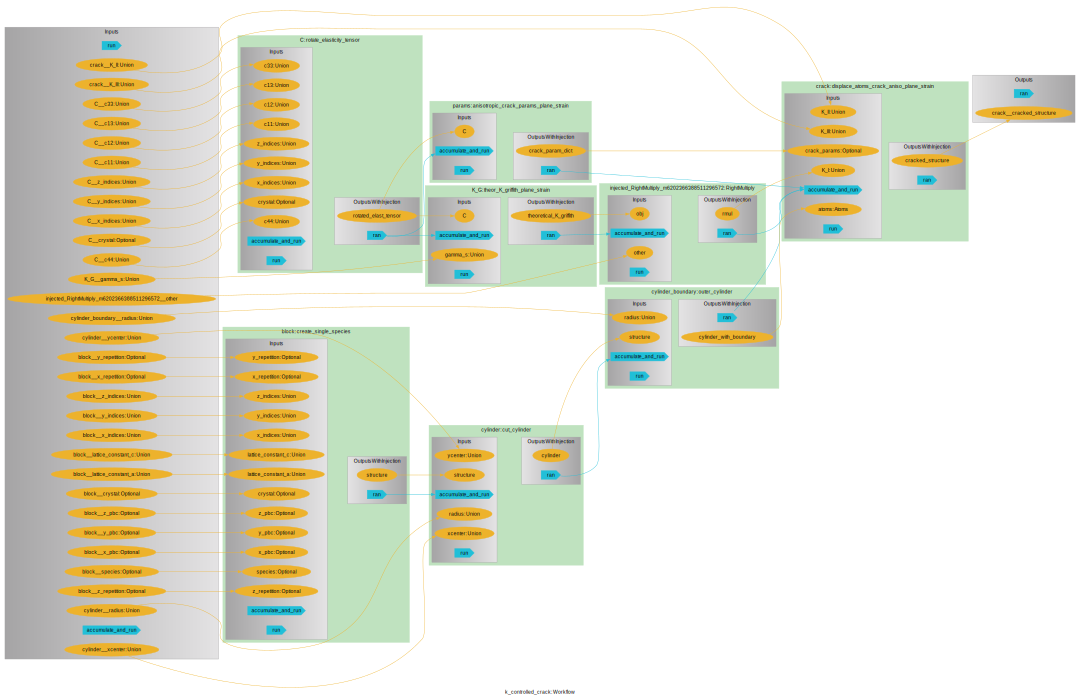

In [5]:
wf.draw(size=(15,15))

In [6]:
from ase.visualize import view
atoms=wf.outputs.crack__cracked_structure.value
view(atoms, viewer='ngl',)

In [7]:
pf = PyironFlow([wf])
pf.gui

In [10]:
pf.out_widget

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…